# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pachino
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | nkurenkuru
City not found. Skipping...
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | belmonte
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | saint-denis
Processing Record 8 of Set 1 | svetlyy
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | minusinsk
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | el alamo
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | nahiyat al fuhud
Processing Record 20 of Set 1 | gulf shores
Processing Record 21 of Set 1 | albany
Processi

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pachino,36.7186,15.0907,25.87,67,0,9.52,IT,1724109157
1,saldanha,-33.0117,17.9442,12.59,86,0,3.03,ZA,1724109158
2,port elizabeth,-33.9180,25.5701,16.29,63,0,2.06,ZA,1724109161
3,belmonte,-15.8631,-38.8828,22.43,86,46,3.51,BR,1724109162
4,port-aux-francais,-49.3500,70.2167,3.20,81,54,15.81,TF,1724109163


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pachino,36.7186,15.0907,25.87,67,0,9.52,IT,1724109157
1,saldanha,-33.0117,17.9442,12.59,86,0,3.03,ZA,1724109158
2,port elizabeth,-33.9180,25.5701,16.29,63,0,2.06,ZA,1724109161
3,belmonte,-15.8631,-38.8828,22.43,86,46,3.51,BR,1724109162
4,port-aux-francais,-49.3500,70.2167,3.20,81,54,15.81,TF,1724109163


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

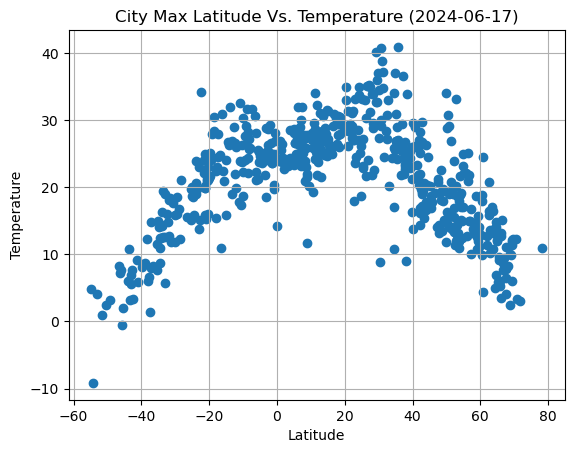

In [80]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude Vs. Temperature (2024-06-17)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

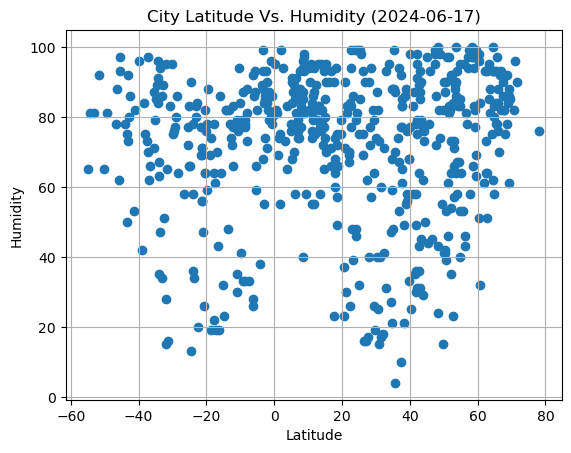

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (2024-06-17)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

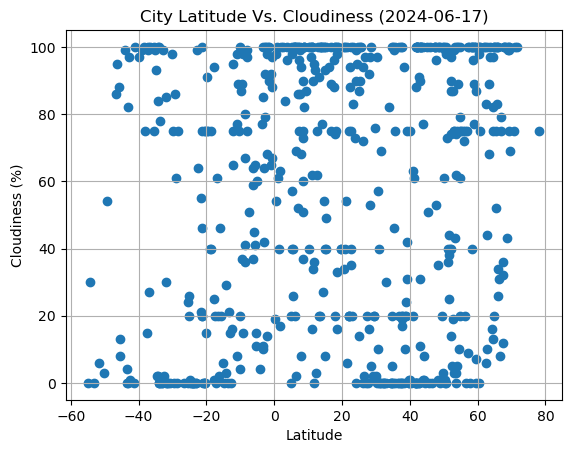

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

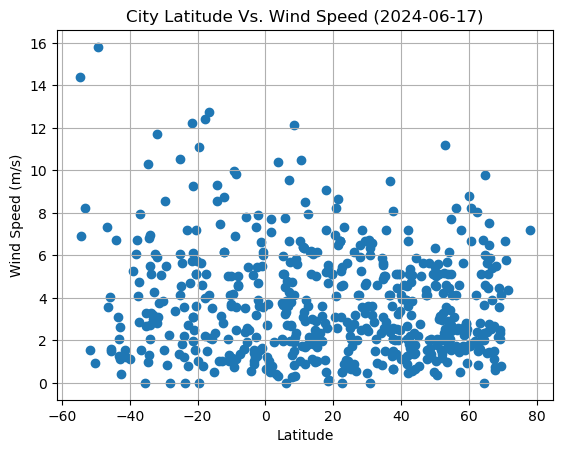

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq, rvalue

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pachino,36.7186,15.0907,25.87,67,0,9.52,IT,1724109157
5,saint-denis,48.9167,2.3333,18.01,74,0,2.06,FR,1724109164
6,svetlyy,54.6750,20.1347,14.99,85,79,2.43,RU,1724109165
7,klyuchi,52.2667,79.1667,15.56,73,87,3.27,RU,1724109166
8,lihue,21.9789,-159.3672,28.77,67,20,6.69,US,1724109167


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saldanha,-33.0117,17.9442,12.59,86,0,3.03,ZA,1724109158
2,port elizabeth,-33.9180,25.5701,16.29,63,0,2.06,ZA,1724109161
3,belmonte,-15.8631,-38.8828,22.43,86,46,3.51,BR,1724109162
4,port-aux-francais,-49.3500,70.2167,3.20,81,54,15.81,TF,1724109163
10,saint-pierre,-21.3393,55.4781,19.82,56,20,3.09,RE,1724109170


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6899640451700046


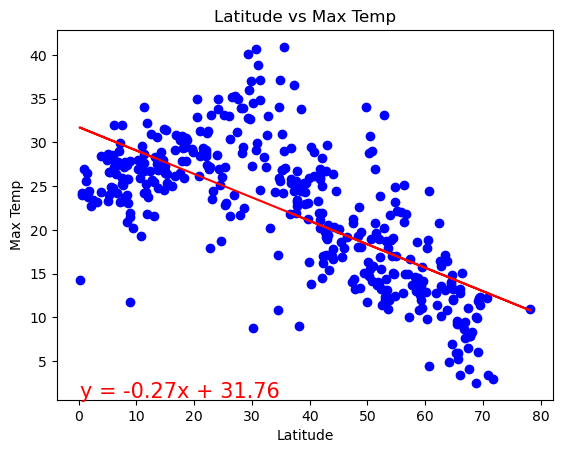

In [87]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
north_regress_values, north_line_eq, rvalue_north = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_north}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color = 'blue')
plt.plot(x_values, north_regress_values, "r-")
plt.annotate(north_line_eq, (x_values.min(), north_regress_values.min() -10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

The r-value is 0.8469278436661292


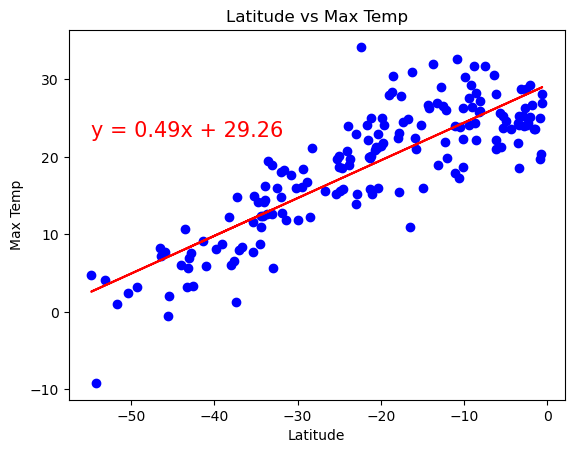

In [88]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
south_regress_values, south_line_eq, rvalue_south = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_south}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, south_regress_values, "r-")
plt.annotate(south_line_eq, (x_values.min(), south_regress_values.min() + 20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.show()

**Discussion about the linear relationship:** These graphs depict the linear regression relationship between the Latitude and Max Temperature for the Northern and Southern Hemisphere. When looking at the Northern Hemisphere, you can see a strong negative linear relationship, showing that as temperature decreases, so does the latitude. In comparison to the Southern Hemisphere, there is a strong positive linear relationship, showing that as the temperature increases, so does the latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.01636285039610608


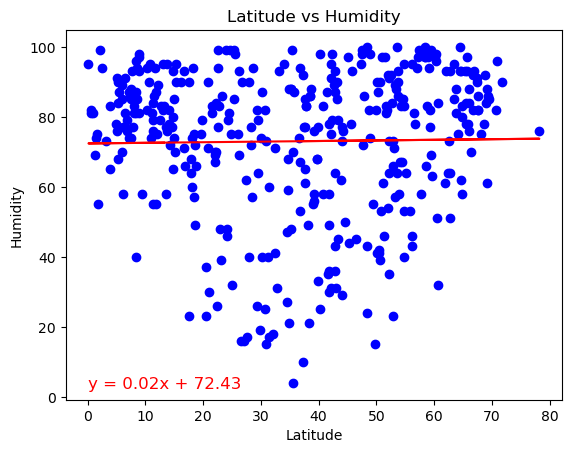

In [104]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
north_regress_values, north_line_eq, rvalue_north = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_north}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color = 'blue')
plt.plot(x_values, north_regress_values, "r-")
plt.annotate(north_line_eq, (x_values.min(), north_regress_values.min() -70), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

The r-value is -0.023555438903801584


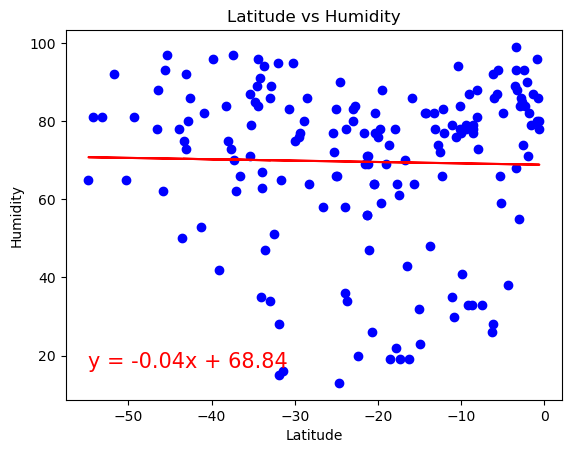

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
south_regress_values, south_line_eq, rvalue_south = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_south}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, south_regress_values, "r-")
plt.annotate(south_line_eq, (x_values.min(), south_regress_values.min() -52), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.show()

**Discussion about the linear relationship:** These graphs depict the linear regression relationship between the Latitude and Humidity for the Northern and Southern Hemisphere. When looking at both Hemispheres, there is a weak linear relationship between Latitude and Humidity. However, the trend is slightly positive in the Northern Hemisphere and is slightly negative in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.024031559734149024


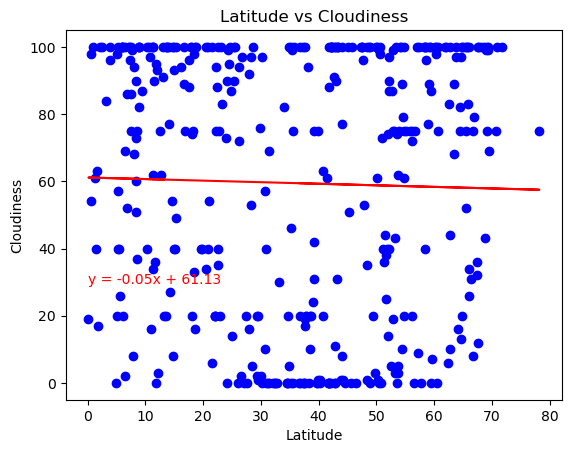

In [106]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
north_regress_values, north_line_eq, rvalue_north = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_north}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color = 'blue')
plt.plot(x_values, north_regress_values, "r-")
plt.annotate(north_line_eq, (x_values.min(), north_regress_values.min() -28), fontsize=10, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

The r-value is 0.1616959972227274


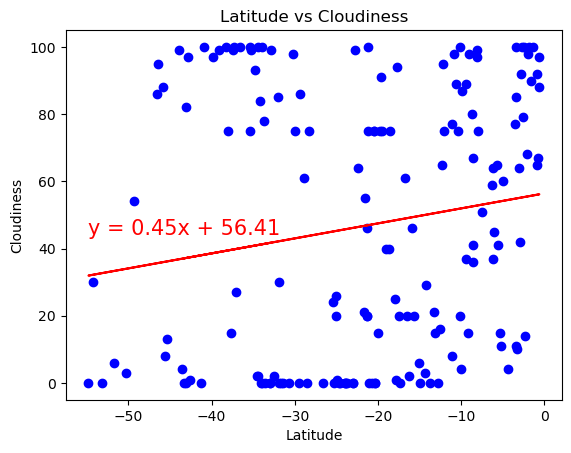

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
south_regress_values, south_line_eq, rvalue_south = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_south}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, south_regress_values, "r-")
plt.annotate(south_line_eq, (x_values.min(), south_regress_values.min() + 12), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.show()

**Discussion about the linear relationship:** These graphs depict the linear regression relationship between the Latitude and Cloudiness for the Northern and Southern Hemisphere. For both Hemispheres, there is no linear relationship between Latitude and Cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.051938398371582144


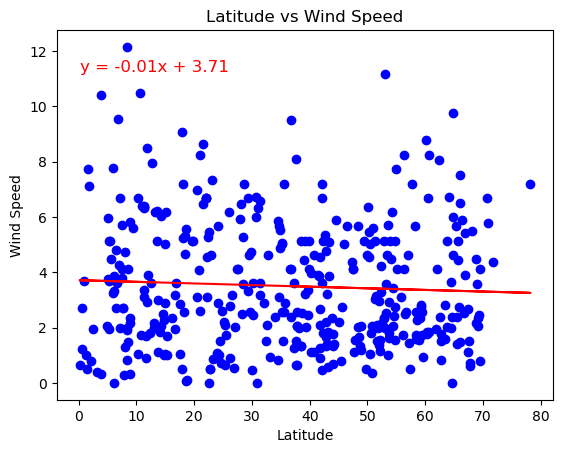

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
north_regress_values, north_line_eq, rvalue_north = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_north}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color = 'blue')
plt.plot(x_values, north_regress_values, "r-")
plt.annotate(north_line_eq, (x_values.min(), north_regress_values.min() + 8), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

The r-value is -0.08589979667907245


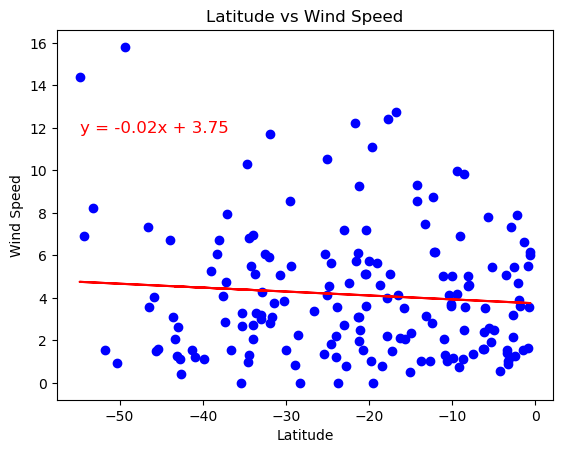

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
south_regress_values, south_line_eq, rvalue_south = linear_regression(x_values, y_values)

# Printing the R-Value
print(f"The r-value is {rvalue_south}")

# Making the Scatter Plot
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, south_regress_values, "r-")
plt.annotate(south_line_eq, (x_values.min(), south_regress_values.min() +8), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.show()

**Discussion about the linear relationship:** These graphs depict the linear regression relationship between the Latitude and Wind Speed for the Northern and Southern Hemisphere. In both the Northern and Southern Hemisphere, there is a weak negative linear relationship between Latitude and Windspeed, with the relationship being just slightly steeper in the Southern Hemisphere.